[2, 19, 47, 74, 39, 30, 99, 31, 30, 59, 37, 18, 36, 2, 85, 98, 27, 37, 70, 23]


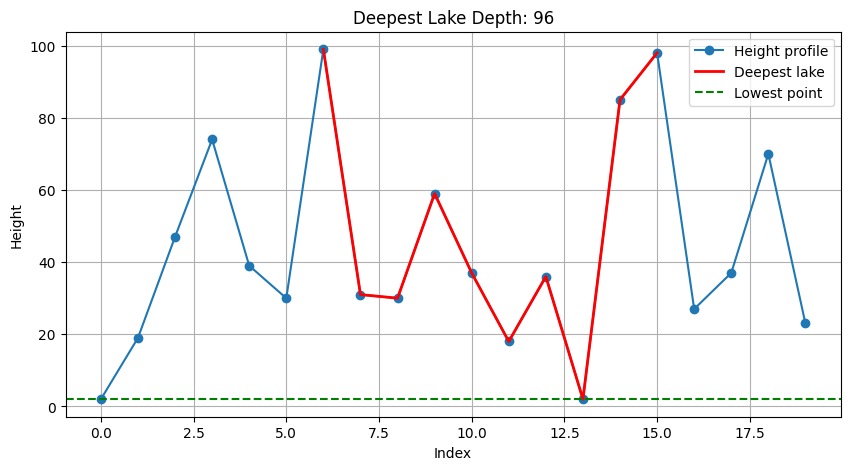

Numbers in the deepest lake: [99, 31, 30, 59, 37, 18, 36, 2, 85, 98]


In [4]:
import random
import matplotlib.pyplot as plt

# Generate 20 random heights
random.seed()
heights = [random.randint(0, 100) for _ in range(20)]

print(heights)
# Function to find the deepest valid lake
def find_deepest_lake(heights):
    n = len(heights)
    lakes = []

    for i in range(n - 1):
        for j in range(i + 2, n):  
            if heights[i] > min(heights[i+1:j]) and heights[j] > min(heights[i+1:j]):  
                # Valid lake: both ends must be higher than any inner point
                min_point = min(heights[i+1:j])
                min_height = min(heights[i], heights[j])  
                depth = min_height - min_point

                # **Ensure all values inside are below both boundaries**
                valid_lake = all(h < min_height for h in heights[i+1:j])
                if valid_lake:
                    lakes.append((depth, j - i, j, i, j, min_point))  

    if not lakes:
        return 0, None

    # Select the **deepest** lake, breaking ties by **rightmost one**
    lakes.sort(reverse=True, key=lambda x: (x[0], x[2]))  
    best_lake = lakes[0]

    i, j, min_point = best_lake[3], best_lake[4], best_lake[5]

    return best_lake[0], (i, j, min_point)

# Find the correct deepest lake
depth, lake = find_deepest_lake(heights)

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(heights, marker='o', linestyle='-', label="Height profile")

# Highlight the correct deepest lake
if lake:
    i, j, min_point = lake
    plt.plot(range(i, j+1), heights[i:j+1], color='red', linestyle='-', linewidth=2, label="Deepest lake")
    plt.axhline(min_point, color='green', linestyle='dashed', label="Lowest point")

# Formatting plot
plt.xlabel("Index")
plt.ylabel("Height")
plt.title(f"Deepest Lake Depth: {depth}")
plt.legend()
plt.grid()
plt.show()

# Print the list of numbers in the correct deepest lake
if lake:
    i, j, _ = lake
    print("Numbers in the deepest lake:", heights[i:j+1])
